In [162]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [5]:
xl = pd.ExcelFile('./Despesa_Grupo.xls')

In [98]:
data = []

def get_budget_value(x, title):
    return x[x['Unnamed: 0'].str.startswith(title) == True]['Unnamed: 1'].values[0]

for year in range(1994, 2018):
    sheet = xl.parse(str(year))
    year_values = {
        'year': year,
        'PessoaleEncargosSociais': get_budget_value(sheet, 'Pessoal e Encargos Sociais'),
        'JuroseEncargosdaDívida': get_budget_value(sheet, 'Juros e Encargos da Dívida'),
        'TransferenciasaEstadosDFeMunicípios': get_budget_value(sheet, 'Transferências a Estados, DF e Municípios'),
        'BeneficiosPrevidenciarios': get_budget_value(sheet, 'Benefícios Previdenciários²'),
        'DemaisDespesasCorrentes': get_budget_value(sheet, 'Demais Despesas Correntes'),
        'Investimentos': get_budget_value(sheet, 'Investimentos'),
        'InversoesFinanceiras': get_budget_value(sheet, 'Inversões Financeiras'),
        'AmortizacaodaDivida': get_budget_value(sheet, 'Amortização da Dívida'),
        'Total': get_budget_value(sheet, 'SUBTOTAL'),
        'DespesasCorrente': get_budget_value(sheet, 'DESPESAS CORRENTES'),
        'DespesasDeCapital': get_budget_value(sheet, 'DESPESAS DE CAPITAL')
    }
    data.append(year_values)

In [100]:
df = pd.DataFrame(data)

In [224]:
def format_grid(ax, axis_color='#dcdcdc'):
    plt.grid(color=axis_color, axis='y', linewidth=1.5)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

In [233]:
def add_footer(ax, text, x=0.5, y=-0.12):
    ax.text(x, y, text,
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes,
        color='grey')

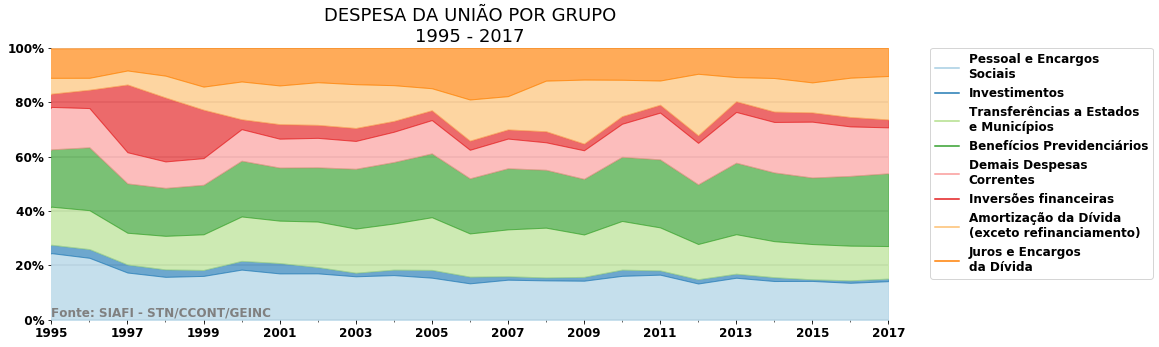

In [245]:
families = ['DejaVu Sans']
matplotlib.rcParams.update({'font.size': 12, 'font.family': families, 'font.weight': 'semibold'})
x = df.year.values
y1 = (df.PessoaleEncargosSociais / df.Total).values
y2 = y1 + (df.Investimentos / df.Total).values
y3 = y2 + (df.TransferenciasaEstadosDFeMunicípios / df.Total).values
y4 = y3 + (df.BeneficiosPrevidenciarios / df.Total).values
y5 = y4 + (df.DemaisDespesasCorrentes / df.Total).values
y6 = y5 + (df.InversoesFinanceiras / df.Total).values
y7 = y6 + (df.AmortizacaodaDivida / df.Total).values
y8 = y7 + (df.JuroseEncargosdaDívida / df.Total).values

fig = plt.figure(figsize=(15, 5))
ax = plt.subplot2grid((1, 1), (0, 0))

colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00']
def draw_line(ystart, yend, color, label):
    ax.fill_between(x, ystart, yend, color=color, interpolate=True, zorder=2, alpha=0.65)
    ax.plot([], [], label=label, color=color)

draw_line(0, y1, colors[0], 'Pessoal e Encargos\nSociais')
draw_line(y1, y2, colors[1], 'Investimentos')
draw_line(y2, y3, colors[2], 'Transferências a Estados\ne Municípios')
draw_line(y3, y4, colors[3], 'Benefícios Previdenciários')
draw_line(y4, y5, colors[4], 'Demais Despesas\nCorrentes')
draw_line(y5, y6, colors[5], 'Inversões financeiras')
draw_line(y6, y7, colors[6], 'Amortização da Dívida\n(exceto refinanciamento)')
draw_line(y7, y8, colors[7], 'Juros e Encargos\nda Dívida')

ax.set_xlim(1995, 2017)
ax.set_ylim(0, 1)

plt.legend(ncol=1,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
format_grid(ax)
add_footer(ax, 'Fonte: SIAFI - STN/CCONT/GEINC', x=0,y=0)

import numpy as np

ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.xaxis.set_ticks(np.arange(1995, 2018, 2))
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in ax.get_yticks()])

plt.title('DESPESA DA UNIÃO POR GRUPO\n1995 - 2017', fontsize=18)
plt.show()

In [306]:
def plot_bar_and_line(df, column, title):

    fig = plt.figure(figsize=(15, 5))
    ax1 = plt.subplot2grid((1, 1), (0, 0))
    
    axis_color = '#dcdcdc'
    x = df.year.values
    y1 = df[column].values
    y2 = 100 * df[column].values / df.Total
    format_grid(ax1)
    ax1.bar(x, y1, zorder=2, alpha=0.7, color='#9C99E8')
    ax1.set_yticklabels(['{:3.0f}'.format(x/1000000000) for x in ax1.get_yticks()])
    ax1.tick_params(axis='x', color=axis_color)
    ax1.tick_params(axis='y', color=axis_color, width=1.5)

    ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax1.xaxis.set_ticks(np.arange(1995, 2018, 2))

    plt.ylabel('Bilhões de R$')

    ax2 = ax1.twinx()

    plt.ylabel('% do Orçamento')
    ax2.plot(x, y2, linewidth=3, color='#FF7561')
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    plt.title(title)
    plt.show()

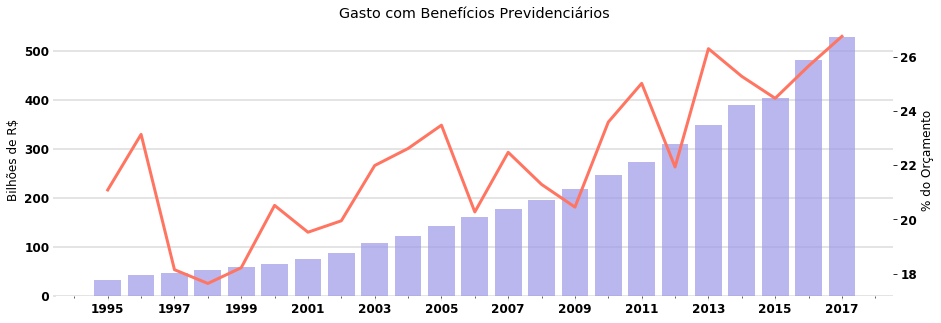

In [308]:
plot_bar_and_line(df_filtered, 'BeneficiosPrevidenciarios', 'Gasto com Benefícios Previdenciários')

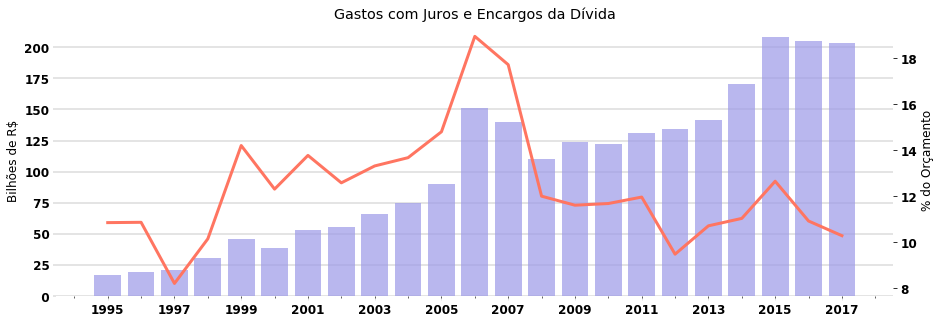

In [310]:
plot_bar_and_line(df_filtered, 'JuroseEncargosdaDívida', 'Gastos com Juros e Encargos da Dívida')